# Features 2
Acá probamos diferentes modelos para las features 2.
|hora|dia_semana|mes|es_feriado|total_bicis_salieron_global|pct_mujeres_salieron_global|pct_hombres_salieron_global|q1_edad_salieron_global|media_edad_salieron_global|q3_edad_salieron_global|pct_iconic_salieron_global|pct_fit_salieron_global|bicis_salieron_estacion_2| ... | bicis_salieron_estacion_x|llegadas_estacion_2_h1| ...|llegadas_estacion_x_h24|target_estacion_2| ... |target_estacion_x|

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import importlib

In [62]:
import models_f2 as md2
import data_processing as dp
import metrics as mt

In [63]:
BASE_DIR = os.getcwd()
train_f2_path = os.path.join(BASE_DIR, '..', '..', 'data', 'processed', 'features2', 'train_dataset_features2.csv')
val_f2_path = os.path.join(BASE_DIR, '..', '..', 'data', 'processed', 'features2', 'val_dataset_features2.csv')
test_f2_path = os.path.join(BASE_DIR, '..', '..','data', 'processed', 'features2', 'test_dataset_features2.csv')

In [64]:
train_f2 = pd.read_csv(train_f2_path)
val_f2 = pd.read_csv(val_f2_path)
test_f2 = pd.read_csv(test_f2_path)

# Modelos básicos
Corremos modelos básicos con hiperparámetros arbitrarios para ver como es la situación actual. Mostramos para cada modelo las métricas.

### 1. Predicción 202 solo con 202
Creamos un dataset que solo usa la estación de la facultad de derecho porque es la que más viajes tiene.

In [65]:
# 202
importlib.reload(dp)
df_filtrado_train_202 = dp.filtrar_dataset_por_estaciones(train_f2, [202], verbose=False)
X_train_202, y_train_202, feature_names_train_202 = dp.dividir_dataset_estacion(df_filtrado_train_202, 202)

df_filtrado_val_202 = dp.filtrar_dataset_por_estaciones(val_f2, [202], verbose=False)
X_val_202, y_val_202, feature_names_val_202 = dp.dividir_dataset_estacion(df_filtrado_val_202, 202, verbose=False)

df_filtrado_test_202 = dp.filtrar_dataset_por_estaciones(test_f2, [202], verbose=False)
X_test_202, y_test_202, feature_names_test_202 = dp.dividir_dataset_estacion(df_filtrado_test_202, 202, verbose=False)

Dataset filtrado: (12108, 5082) → (12108, 401) (estaciones: [202])
✓ Columna 'hora' convertida a hora (0-23)
=== DIVISIÓN DATASET ESTACIÓN 202 ===
Shape original: (12108, 401)
Features (X): (12108, 39)
Target (y): (12108,)
Target columna: target_estacion_202
Rango de y: 0.00 - 38.00
Media de y: 2.81
Features incluidos: 39

📊 ESTADÍSTICAS DEL TARGET:
  - Valores nulos: 0
  - Valores cero: 4521
  - Percentiles: 25%=0.00, 50%=1.00, 75%=4.00
Dataset filtrado: (1950, 4970) → (1950, 393) (estaciones: [202])
Dataset dividido estación 202: X(1950, 39), y(1950,)
Dataset filtrado: (2037, 5096) → (2037, 402) (estaciones: [202])
Dataset dividido estación 202: X(2037, 39), y(2037,)


In [66]:
importlib.reload(md2)
pred_202 = md2.linear_regression(X_train_202, y_train_202, X_val_202)


MÉTRICAS DE REGRESIÓN - Linear Regression
                           Métrica      Linear Regression
               Mean Absolute Error                 1.2021
                Mean Squared Error                 3.5738
           Root Mean Squared Error                 1.8905
                         R-squared                 0.6643
Mean Absolute Percentage Error (%) 155611118851783136.00%
                Explained Variance                 0.6700
                     Maximum Error                12.7255
                       Correlation                 0.8195
                              Bias                 0.2466
                Relative Error (%)         3455260969.35%
 --- Estadísticas Descriptivas ---                       
              Media Valores Reales                 1.9882
                Media Predicciones                 2.2348
         Desv. Est. Valores Reales                 3.2627
           Desv. Est. Predicciones                 2.8015
                Número de Mue

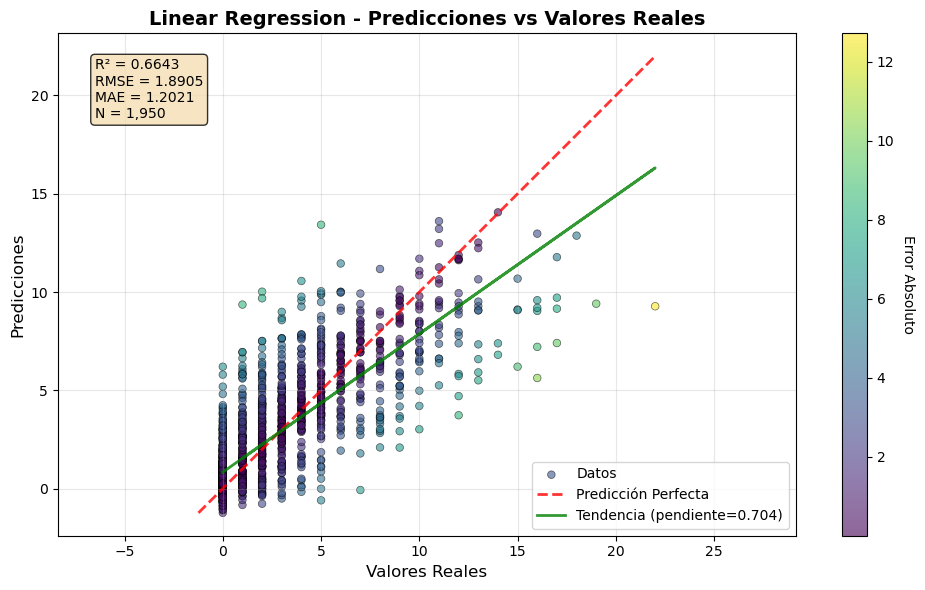

In [67]:
importlib.reload(mt)
metricas, tabla = mt.evaluar_modelo_regresion(y_val_202, pred_202, "Linear Regression")

In [68]:
importlib.reload(md2)
print("Training Random Forest Regressor...")
pred_202_rf = md2.random_forest_regressor(X_train_202, y_train_202, X_val_202)
print("Training Gradient Boosting Regressor...")
pred_202_gb = md2.gradient_boosting_regressor(X_train_202, y_train_202, X_val_202)
print("Training Decision Tree Regressor...")
pred_202_dt = md2.decision_tree_regressor(X_train_202, y_train_202, X_val_202)
print("Training KNN Regressor...")
pred_202_knn = md2.knn_regressor(X_train_202, y_train_202, X_val_202)
# print("Training SVR Regressor...")
# pred_202_svr = md2.svr_regressor(X_train_202, y_train_202, X_val_202)
print("Training Ridge Regression...")
pred_202_lr_ridge = md2.ridge_regression(X_train_202, y_train_202, X_val_202)
print("Training Lasso Regression...")
pred_202_lr_lasso = md2.lasso_regression(X_train_202, y_train_202, X_val_202)


Training Random Forest Regressor...
Training Gradient Boosting Regressor...
Training Decision Tree Regressor...
Training KNN Regressor...
Training Ridge Regression...
Training Lasso Regression...


In [69]:
# comparación de modelos
importlib.reload(mt)
modelos_predicciones = {'Linear Regression' : pred_202,
        'Random Forest Regressor' : pred_202_rf,
        'Gradient Boosting Regressor' : pred_202_gb,
        'Decision Tree Regressor' : pred_202_dt,
        'KNN Regressor' : pred_202_knn,
        # 'SVR Regressor' : pred_202_svr,
        'Ridge Regression' : pred_202_lr_ridge,
        'Lasso Regression' : pred_202_lr_lasso}

mt.tabla_metricas_modelos(modelos_predicciones, y_val_202)


🏆 MEJOR MODELO: Random Forest Regressor
   R² = 0.6987 | RMSE = 1.7910 | MAE = 1.0041


,Rank,Modelo,MAE,RMSE,R²,MAPE (%),Correlación,N_Muestras
0,1,Random Forest Regressor,1.0041,1.7910,0.6987,7.945505e+16,0.8437,1950
1,2,Gradient Boosting Regressor,1.0233,1.8256,0.6869,8.706279e+16,0.8339,1950
2,3,Linear Regression,1.2021,1.8905,0.6643,1.556111e+17,0.8195,1950
3,4,Ridge Regression,1.2035,1.8909,0.6641,1.561083e+17,0.8195,1950
4,5,Lasso Regression,1.3314,1.9594,0.6394,1.993967e+17,0.8074,1950
5,6,KNN Regressor,1.0775,2.0296,0.6131,6.420516e+16,0.8104,1950
6,7,Decision Tree Regressor,1.3179,2.5488,0.3898,6.212658e+16,0.7287,1950


### 2. Predicción 202 con 202, 
Predecimos: 202 (Facultad de Derecho)
Estaciones en features:
- 202 (Facultad de Derecho)
- 5 (Plaza Italia)
- 175 (Constitución)
- 14 (Pacifico)
- 130 (Retiro II)


In [70]:
# 202 con más estaciones populares
importlib.reload(dp)
df_filtrado_train_202_populares = dp.filtrar_dataset_por_estaciones(train_f2, [202, 5, 175, 14, 130], verbose=False)
X_train_202_populares, y_train_202_populares, feature_names_train_202_populares = dp.dividir_dataset_estacion(df_filtrado_train_202_populares, 202)

df_filtrado_val_202_populares = dp.filtrar_dataset_por_estaciones(val_f2, [202, 5, 175, 14, 130], verbose=False)
X_val_202_populares, y_val_202_populares, feature_names_val_202_populares = dp.dividir_dataset_estacion(df_filtrado_val_202_populares, 202, verbose=False)


Dataset filtrado: (12108, 5082) → (12108, 453) (estaciones: [202, 5, 175, 14, 130])
✓ Columna 'hora' convertida a hora (0-23)
=== DIVISIÓN DATASET ESTACIÓN 202 ===
Shape original: (12108, 453)
Features (X): (12108, 91)
Target (y): (12108,)
Target columna: target_estacion_202
Rango de y: 0.00 - 38.00
Media de y: 2.81
Features incluidos: 91

📊 ESTADÍSTICAS DEL TARGET:
  - Valores nulos: 0
  - Valores cero: 4521
  - Percentiles: 25%=0.00, 50%=1.00, 75%=4.00
Dataset filtrado: (1950, 4970) → (1950, 445) (estaciones: [202, 5, 175, 14, 130])
Dataset dividido estación 202: X(1950, 91), y(1950,)


In [71]:
importlib.reload(md2)
pred_202_populares = md2.linear_regression(X_train_202_populares, y_train_202_populares, X_val_202_populares)


MÉTRICAS DE REGRESIÓN - Linear Regression
                           Métrica      Linear Regression
               Mean Absolute Error                 1.1942
                Mean Squared Error                 3.5088
           Root Mean Squared Error                 1.8732
                         R-squared                 0.6704
Mean Absolute Percentage Error (%) 157843586342994784.00%
                Explained Variance                 0.6767
                     Maximum Error                12.0851
                       Correlation                 0.8243
                              Bias                 0.2589
                Relative Error (%)         3504831704.54%
 --- Estadísticas Descriptivas ---                       
              Media Valores Reales                 1.9882
                Media Predicciones                 2.2471
         Desv. Est. Valores Reales                 3.2627
           Desv. Est. Predicciones                 2.8619
                Número de Mue

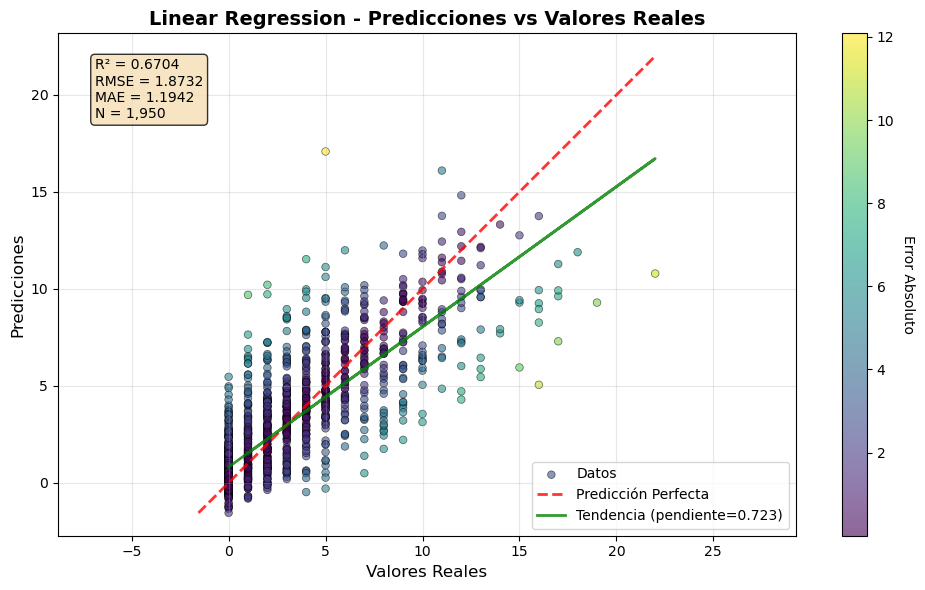

In [72]:
importlib.reload(mt)
metricas, tabla = mt.evaluar_modelo_regresion(y_val_202, pred_202_populares, "Linear Regression")

In [73]:
importlib.reload(md2)
print("Training Random Forest Regressor on popular stations...")
pred_202_pop_rf = md2.random_forest_regressor(X_train_202_populares, y_train_202_populares, X_val_202_populares)
print("Training Gradient Boosting Regressor on popular stations...")
pred_202_pop_gb = md2.gradient_boosting_regressor(X_train_202_populares, y_train_202_populares, X_val_202_populares)
print("Training Decision Tree Regressor on popular stations...")
pred_202_pop_dt = md2.decision_tree_regressor(X_train_202_populares, y_train_202_populares, X_val_202_populares)
print("Training KNN Regressor on popular stations...")
pred_202_pop_knn = md2.knn_regressor(X_train_202_populares, y_train_202_populares, X_val_202_populares)
# print("Training SVR Regressor on popular stations...")
# pred_202_pop_svr = md2.svr_regressor(X_train_202_populares, y_train_202_populares, X_val_202_populares)
print("Training Ridge Regression on popular stations...")
pred_202_pop_lr_ridge = md2.ridge_regression(X_train_202_populares, y_train_202_populares, X_val_202_populares)
print("Training Lasso Regression on popular stations...")
pred_202_pop_lr_lasso = md2.lasso_regression(X_train_202_populares, y_train_202_populares, X_val_202_populares)

Training Random Forest Regressor on popular stations...
Training Gradient Boosting Regressor on popular stations...
Training Decision Tree Regressor on popular stations...
Training KNN Regressor on popular stations...
Training Ridge Regression on popular stations...
Training Lasso Regression on popular stations...


In [74]:
# Comparación modelos
importlib.reload(mt)
modelos_predicciones_populares = {
    'Linear Regression': pred_202_populares,
    'Random Forest Regressor': pred_202_pop_rf,
    'Gradient Boosting Regressor': pred_202_pop_gb,
    'Decision Tree Regressor': pred_202_pop_dt,
    'KNN Regressor': pred_202_pop_knn,
    # 'SVR Regressor': pred_202_pop_svr,
    'Ridge Regression': pred_202_pop_lr_ridge,
    'Lasso Regression': pred_202_pop_lr_lasso
}
mt.tabla_metricas_modelos(modelos_predicciones_populares, y_val_202_populares)


🏆 MEJOR MODELO: Random Forest Regressor
   R² = 0.7028 | RMSE = 1.7788 | MAE = 0.9788


,Rank,Modelo,MAE,RMSE,R²,MAPE (%),Correlación,N_Muestras
0,1,Random Forest Regressor,0.9788,1.7788,0.7028,7.076656e+16,0.8449,1950
1,2,Gradient Boosting Regressor,1.0226,1.8262,0.6867,8.822125e+16,0.8349,1950
2,3,Linear Regression,1.1942,1.8732,0.6704,1.578436e+17,0.8243,1950
3,4,Ridge Regression,1.1956,1.8737,0.6702,1.583757e+17,0.8243,1950
4,5,Lasso Regression,1.3249,1.9541,0.6413,1.978215e+17,0.8085,1950
5,6,KNN Regressor,1.0811,2.0474,0.6063,6.517517e+16,0.8069,1950
6,7,Decision Tree Regressor,1.4041,2.7139,0.3081,6.258849e+16,0.6936,1950


# Visualización de las features 2
Hacemos PCA y visualizamos, imprimimos estadísticas descriptivas y graficamos las distribuciones de las features. Cualquier cosa que ayude.

Eliminando el 20% superior de las muestras (target > 5.0)
Muestras originales: 12108, Muestras filtradas: 9933


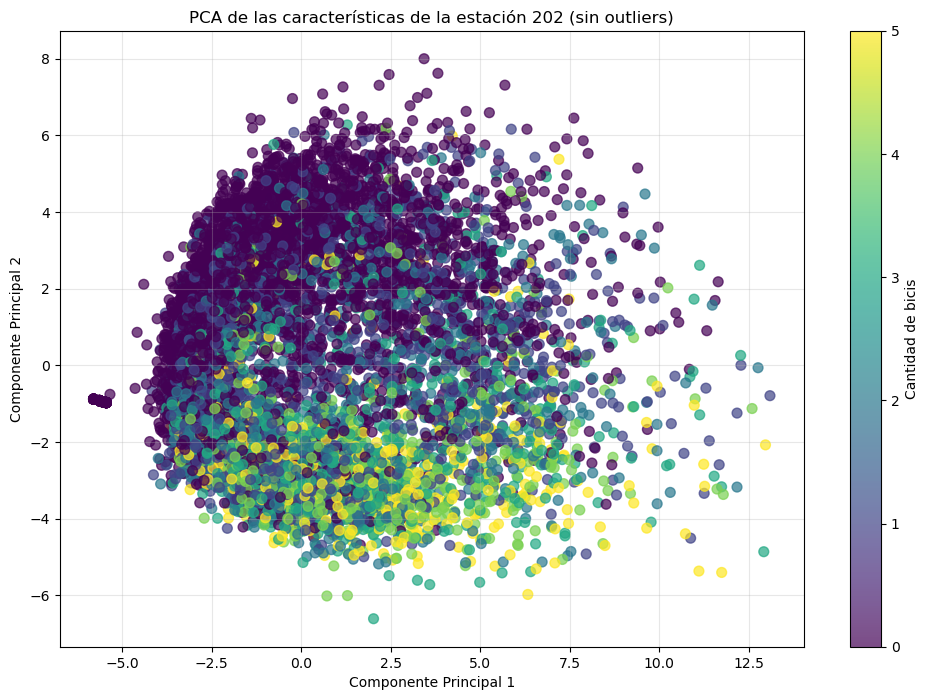

Varianza explicada por los 2 primeros componentes: 43.80%
Componente 1: 24.86%
Componente 2: 18.94%


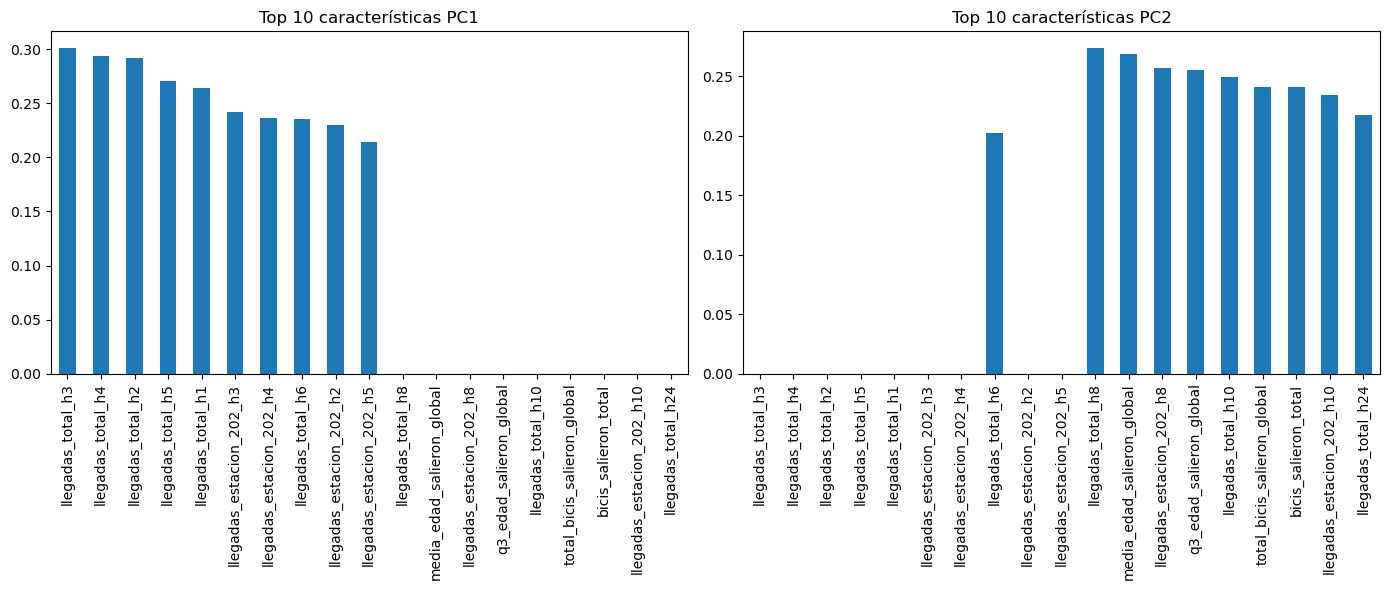

In [75]:
def graficar_pca(X_train, y_train, percentile_cutoff=80):
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    import pandas as pd
    
    # Combinar X e y para filtrar por valor del target
    combined = pd.DataFrame(X_train.copy())
    combined['target'] = y_train
    
    # Calcular el valor de corte del percentil
    cutoff_value = combined['target'].quantile(percentile_cutoff/100)
    print(f"Eliminando el {100-percentile_cutoff}% superior de las muestras (target > {cutoff_value})")
    
    # Filtrar las muestras
    filtered = combined[combined['target'] <= cutoff_value]
    
    # Separar nuevamente X e y
    X_filtered = filtered.drop('target', axis=1)
    y_filtered = filtered['target']
    
    print(f"Muestras originales: {len(X_train)}, Muestras filtradas: {len(X_filtered)}")
    
    # Estandarizar los datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_filtered)
    
    # Aplicar PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    # Graficar los resultados con colores según el target
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_filtered, alpha=0.7, cmap='viridis', s=50)
    plt.colorbar(scatter, label='Cantidad de bicis')
    plt.title('PCA de las características de la estación 202 (sin outliers)')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(alpha=0.3)
    plt.show()
    
    # Mostrar la varianza explicada por cada componente
    explained_variance = pca.explained_variance_ratio_
    print(f"Varianza explicada por los 2 primeros componentes: {sum(explained_variance)*100:.2f}%")
    print(f"Componente 1: {explained_variance[0]*100:.2f}%")
    print(f"Componente 2: {explained_variance[1]*100:.2f}%")
    
    # Analizar importancia de las características
    feature_names = X_filtered.columns
    components_df = pd.DataFrame(pca.components_.T, index=feature_names, columns=['PC1', 'PC2'])
    top_features = pd.concat([
        components_df['PC1'].abs().sort_values(ascending=False).head(10),
        components_df['PC2'].abs().sort_values(ascending=False).head(10)
    ], axis=1)
    
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    top_features['PC1'].plot(kind='bar', title='Top 10 características PC1')
    plt.subplot(1, 2, 2)
    top_features['PC2'].plot(kind='bar', title='Top 10 características PC2')
    plt.tight_layout()
    plt.show()
    
    return pca, scaler

# Aplicar la función a los datos
pca_model, scaler_model = graficar_pca(X_train_202, y_train_202)

# Feature engineering
Acomodamos features, relacionamos, sacamos, reducimos la dimensionalidad, etc. para mejorar el modelo en base a lo que vimos en la visualización.

# Cross validation
Elegimos los óptimos hiperparámetros.

# Entrenamientos finales
Entrenamos los modelos finales con los hiperparámetros óptimos y guardamos los resultados.